#  Clustering on Iris Dataset


In [4]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


from scipy.stats import mode

### Data Import

In [5]:
# --- Load Iris Dataset ---
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA


In [6]:
# Separate DataFrames for each species using 'class' column
iris_setosa = df.loc[df["class"] == "setosa"]
iris_virginica = df.loc[df["class"] == "virginica"]
iris_versicolor = df.loc[df["class"] == "versicolor"]

#### Histogram

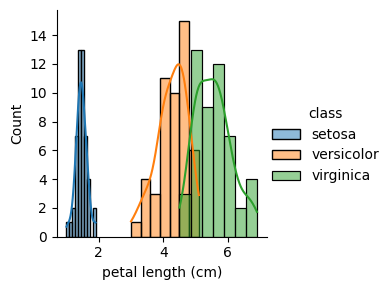

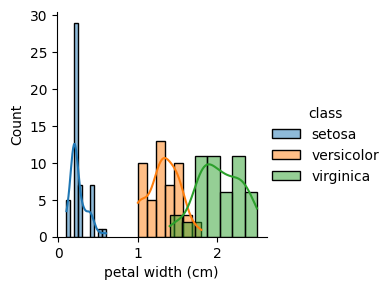

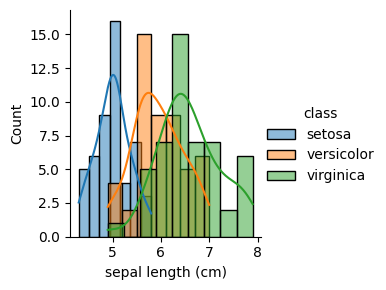

In [7]:
# Petal Length Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "petal length (cm)", kde=True).add_legend()

# Petal Width Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "petal width (cm)", kde=True).add_legend()

# Sepal Length Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "sepal length (cm)", kde=True).add_legend()

plt.show()

####    Box Plot

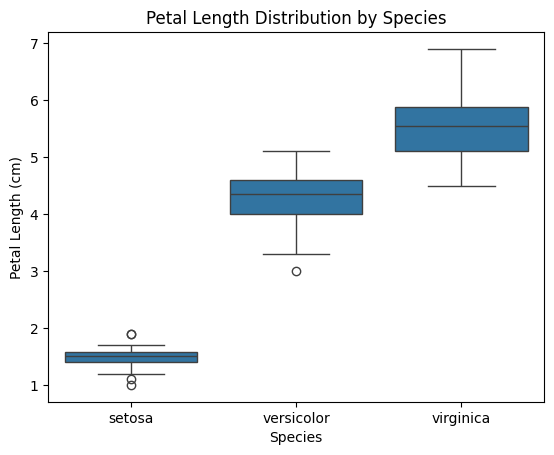

In [8]:
# Box plot of Petal Length by Species
sns.boxplot(x="class", y="petal length (cm)", data=df)
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.title("Petal Length Distribution by Species")
plt.show()

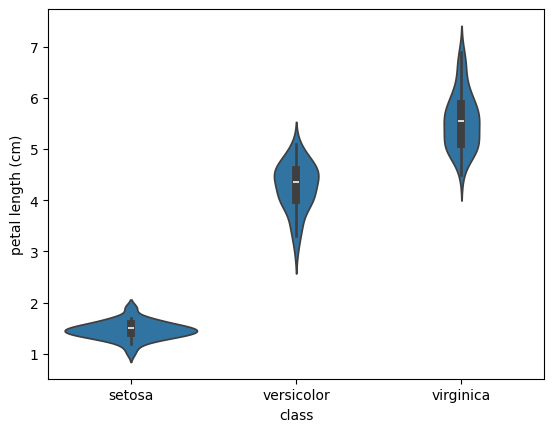

In [9]:
sns.violinplot(x="class", y="petal length (cm)", data=df)
plt.show()

## K Means

#### Features and Target

In [10]:
X = df.drop(columns='class')
y_true = df['class']

#### Standardize Features

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Optimal k: Elbow method plot

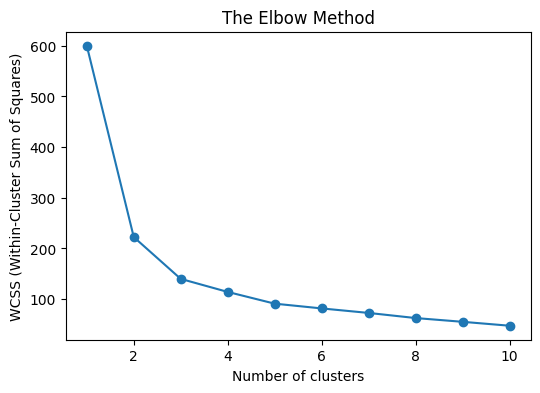

In [12]:
# Compute WCSS for k=1 to 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### K Mean Cluster Model

#### Model Train

In [13]:
# K-Means Clustering (k=3) 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)



### Communicate 

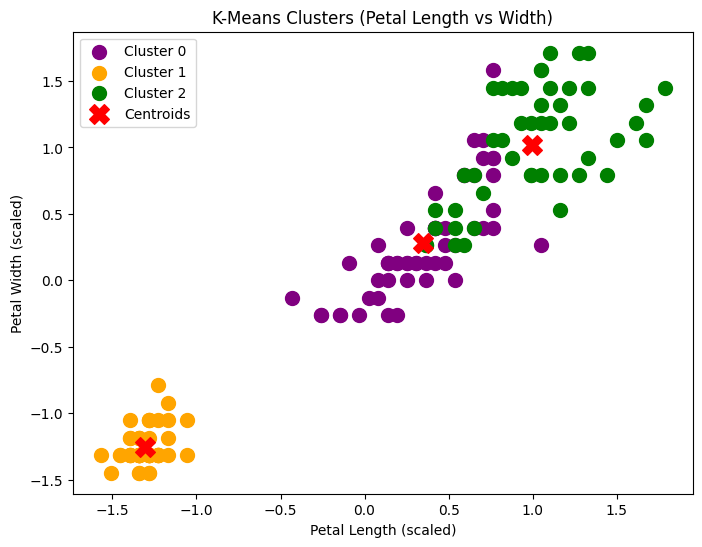

In [14]:
plt.figure(figsize=(8,6))

# Scatter by cluster
plt.scatter(X_scaled[y_kmeans == 0, 2], X_scaled[y_kmeans == 0, 3], s=100, c='purple', label='Cluster 0')
plt.scatter(X_scaled[y_kmeans == 1, 2], X_scaled[y_kmeans == 1, 3], s=100, c='orange', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 2, 2], X_scaled[y_kmeans == 2, 3], s=100, c='green', label='Cluster 2')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-Means Clusters (Petal Length vs Width)')
plt.legend()
plt.show()


### Model Evaluation

In [16]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode string labels to numbers
le = LabelEncoder()
y_true_num = le.fit_transform(y_true)  # e.g., setosa=0, versicolor=1, virginica=2

# Map clusters to most common true label
labels = np.zeros_like(y_kmeans)
for i in range(3):  # number of clusters
    mask = (y_kmeans == i)
    labels[mask] = np.bincount(y_true_num[mask]).argmax()

# Compute "accuracy"
accuracy = np.mean(labels == y_true_num)
print(f"Clustering Accuracy: {accuracy:.3f}")


Clustering Accuracy: 0.833
